In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# import the dataset
df = pd.read_csv('Superstore.csv' , encoding='ISO-8859-1')

In [6]:
# Getting information on the dataset loaded
df.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,55190.379428,229.858001,3.789574,0.156203,28.656896
std,2885.163629,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1.000000,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [8]:
# Data types for each column
df.dtypes

,0
Row ID,int64
Order ID,object
Order Date,object
Ship Date,object
Ship Mode,object
Customer ID,object
Customer Name,object
Segment,object
Country,object
City,object


In [9]:
# First 5 rows of the data set
df.head(5)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/08/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/08/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,06/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [14]:
# Checking for duplicate data
dup_row = df.duplicated().sum()
dup_row
# No Duplicated row

0

In [10]:
# Converting the Order Date and Ship Date column into datatime
df['Order Date'] = pd.to_datetime(df['Order Date'], format='%m/%d/%Y')
df['Ship Date'] = pd.to_datetime(df['Ship Date'], format='%m/%d/%Y')

In [11]:
df['Order Date'].head(5)

,Order Date
0,2016-11-08
1,2016-11-08
2,2016-06-12
3,2015-10-11
4,2015-10-11


In [12]:
df['Ship Date'].head(5)

,Ship Date
0,2016-11-11
1,2016-11-11
2,2016-06-16
3,2015-10-18
4,2015-10-18


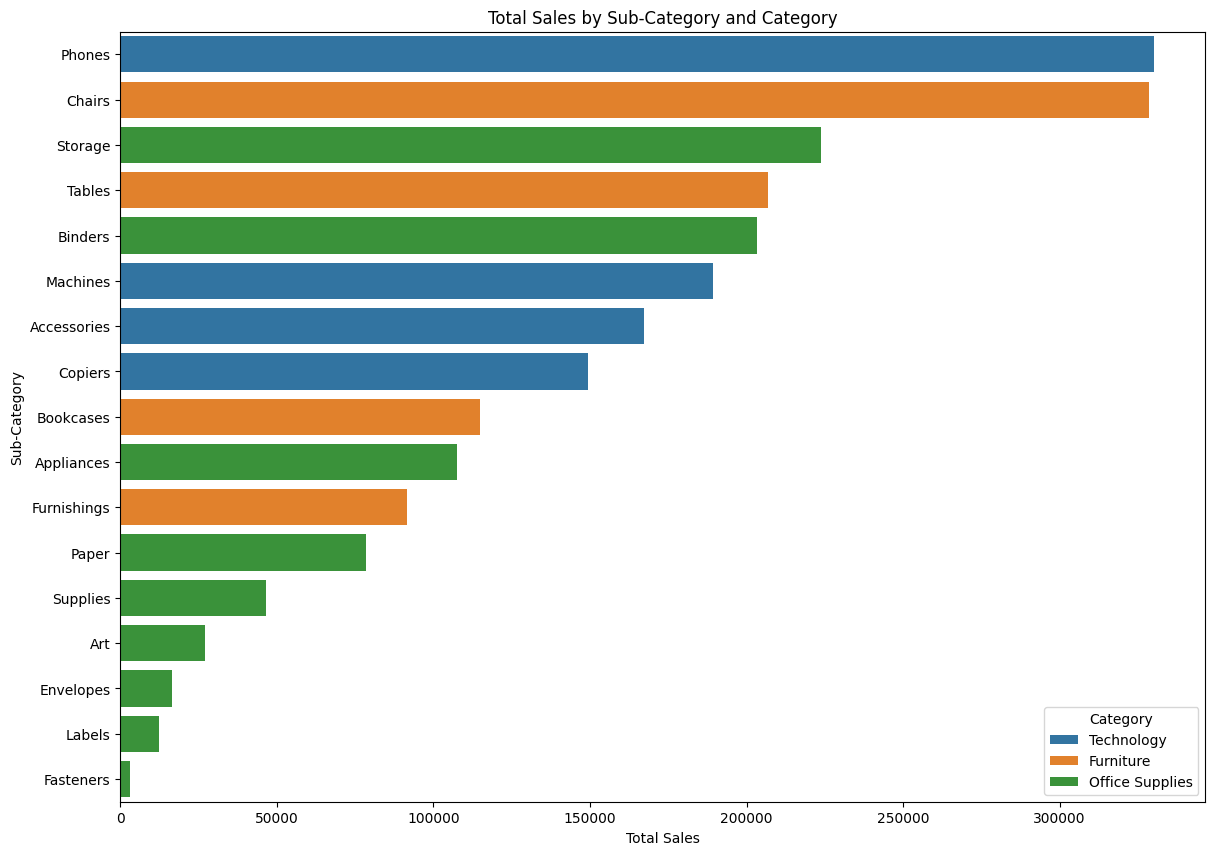

In [15]:
# Sales and Profit Analysis by Category and Sub-Category
cat_sales_profit = df.groupby(['Category', 'Sub-Category']).agg(
    total_sales=('Sales', 'sum'),
    total_profit=('Profit', 'sum')
).sort_values(by='total_sales', ascending=False).reset_index()

plt.figure(figsize=(14, 10))
sns.barplot(x='total_sales', y='Sub-Category', hue='Category', data=cat_sales_profit)
plt.title('Total Sales by Sub-Category and Category')
plt.xlabel('Total Sales')
plt.ylabel('Sub-Category')
plt.legend(title='Category')
plt.show()

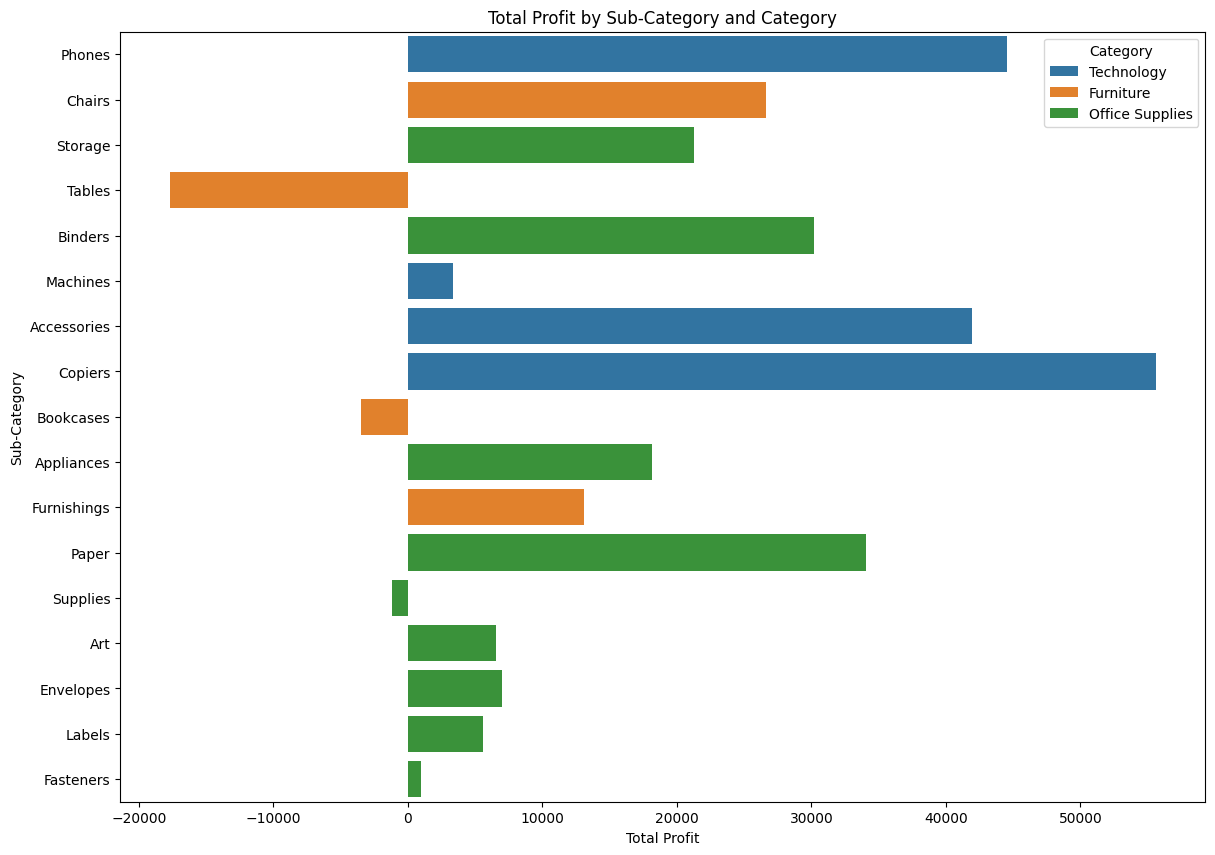

In [16]:
plt.figure(figsize=(14, 10))
sns.barplot(x='total_profit', y='Sub-Category', hue='Category', data=cat_sales_profit)
plt.title('Total Profit by Sub-Category and Category')
plt.xlabel('Total Profit')
plt.ylabel('Sub-Category')
plt.legend(title='Category')
plt.show()

<ipython-input-17-d45d9facfc9b>:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  time_trend = df.groupby(pd.Grouper(key='Order Date', freq='M')).agg(


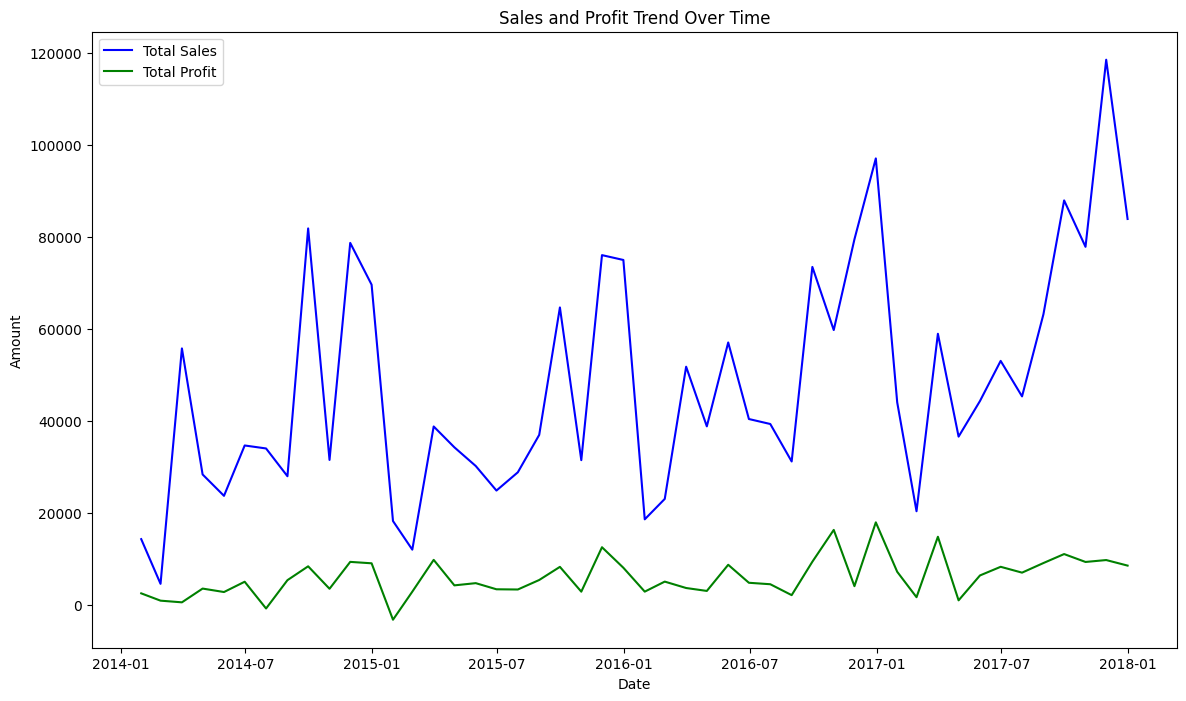

In [17]:
# Trend Analysis - Aggregating Sales over time
time_trend = df.groupby(pd.Grouper(key='Order Date', freq='M')).agg(
    total_sales=('Sales', 'sum'),
    total_profit=('Profit', 'sum')
).reset_index()

plt.figure(figsize=(14, 8))
plt.plot(time_trend['Order Date'], time_trend['total_sales'], label='Total Sales', color='blue')
plt.plot(time_trend['Order Date'], time_trend['total_profit'], label='Total Profit', color='green')
plt.title('Sales and Profit Trend Over Time')
plt.xlabel('Date')
plt.ylabel('Amount')
plt.legend()
plt.show()

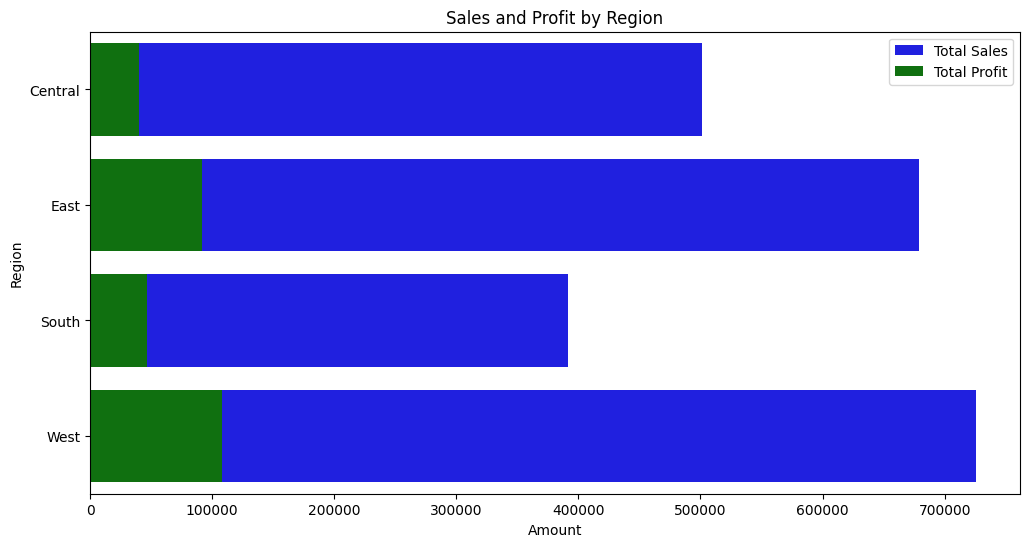

In [18]:
# Geographical Analysis - Aggregating Sales and Profit by Region
region_sales_profit = df.groupby('Region').agg(
    total_sales=('Sales', 'sum'),
    total_profit=('Profit', 'sum')
).reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(x='total_sales', y='Region', data=region_sales_profit, color='blue', label='Total Sales')
sns.barplot(x='total_profit', y='Region', data=region_sales_profit, color='green', label='Total Profit')
plt.title('Sales and Profit by Region')
plt.xlabel('Amount')
plt.ylabel('Region')
plt.legend()
plt.show()

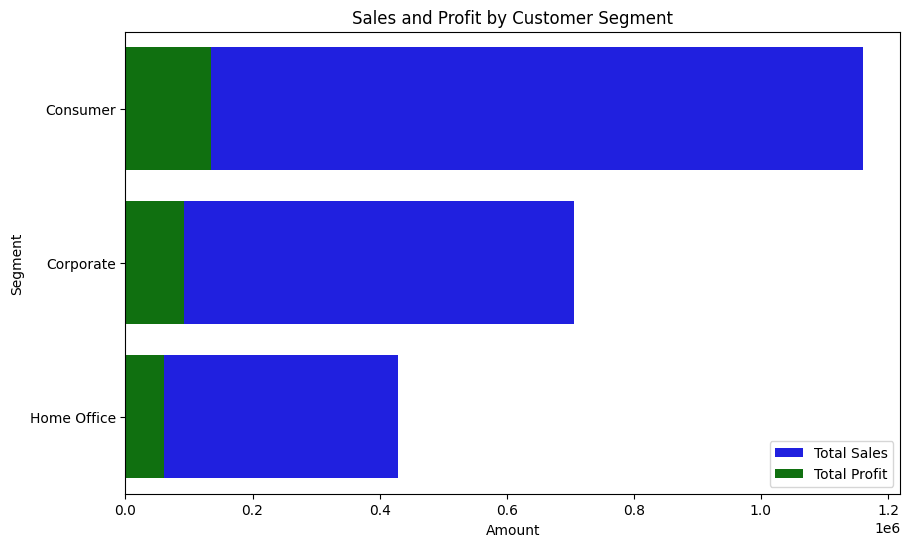

In [19]:
# Customer Segment Analysis - Aggregating Sales and Profit by Segment
segment_sales_profit = df.groupby('Segment').agg(
    total_sales=('Sales', 'sum'),
    total_profit=('Profit', 'sum')
).reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='total_sales', y='Segment', data=segment_sales_profit, color='blue', label='Total Sales')
sns.barplot(x='total_profit', y='Segment', data=segment_sales_profit, color='green', label='Total Profit')
plt.title('Sales and Profit by Customer Segment')
plt.xlabel('Amount')
plt.ylabel('Segment')
plt.legend()
plt.show()

In [20]:
# Product Analysis - Aggregating Sales and Profit by Product Name
product_sales_profit = df.groupby('Product Name').agg(
    total_sales=('Sales', 'sum'),
    total_profit=('Profit', 'sum')
).sort_values(by='total_sales', ascending=False).reset_index()

In [22]:
product_sales_profit

,Product Name,total_sales,total_profit
0,Canon imageCLASS 2200 Advanced Copier,61599.824,2.519993e+04
1,Fellowes PB500 Electric Punch Plastic Comb Bin...,27453.384,7.753039e+03
2,Cisco TelePresence System EX90 Videoconferenci...,22638.480,-1.811078e+03
3,HON 5400 Series Task Chairs for Big and Tall,21870.576,5.684342e-14
4,GBC DocuBind TL300 Electric Binding System,19823.479,2.233505e+03
...,...,...,...
1845,Avery Hi-Liter Pen Style Six-Color Fluorescent...,7.700,3.157000e+00
1846,Grip Seal Envelopes,7.072,2.386800e+00
1847,Xerox 20,6.480,3.110400e+00
1848,Avery 5,5.760,2.822400e+00


In [21]:
# Identify top 5 and bottom 5 products by sales
top_5_products = product_sales_profit.head(5)
bottom_5_products = product_sales_profit.tail(5)

In [23]:
top_5_products

,Product Name,total_sales,total_profit
0,Canon imageCLASS 2200 Advanced Copier,61599.824,2.519993e+04
1,Fellowes PB500 Electric Punch Plastic Comb Bin...,27453.384,7.753039e+03
2,Cisco TelePresence System EX90 Videoconferenci...,22638.480,-1.811078e+03
3,HON 5400 Series Task Chairs for Big and Tall,21870.576,5.684342e-14
4,GBC DocuBind TL300 Electric Binding System,19823.479,2.233505e+03


In [24]:
bottom_5_products

,Product Name,total_sales,total_profit
1845,Avery Hi-Liter Pen Style Six-Color Fluorescent...,7.700,3.1570
1846,Grip Seal Envelopes,7.072,2.3868
1847,Xerox 20,6.480,3.1104
1848,Avery 5,5.760,2.8224
1849,Eureka Disposable Bags for Sanitaire Vibra Gro...,1.624,-4.4660


<ipython-input-25-8c05af9dc355>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='total_sales', y='Product Name', data=top_5_products, palette='Blues_d')


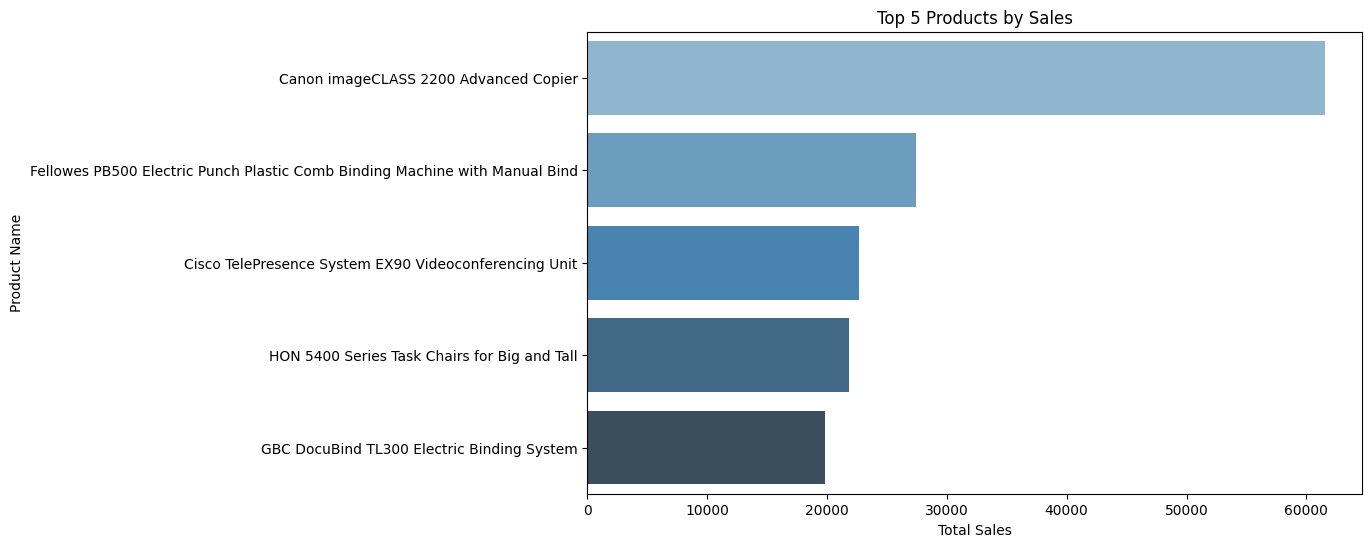

In [25]:
# Plotting top 5 products by sales
plt.figure(figsize=(10, 6))
sns.barplot(x='total_sales', y='Product Name', data=top_5_products, palette='Blues_d')
plt.title('Top 5 Products by Sales')
plt.xlabel('Total Sales')
plt.ylabel('Product Name')
plt.show()

<ipython-input-26-dc3addd4fb99>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='total_sales', y='Product Name', data=bottom_5_products, palette='Reds_d')


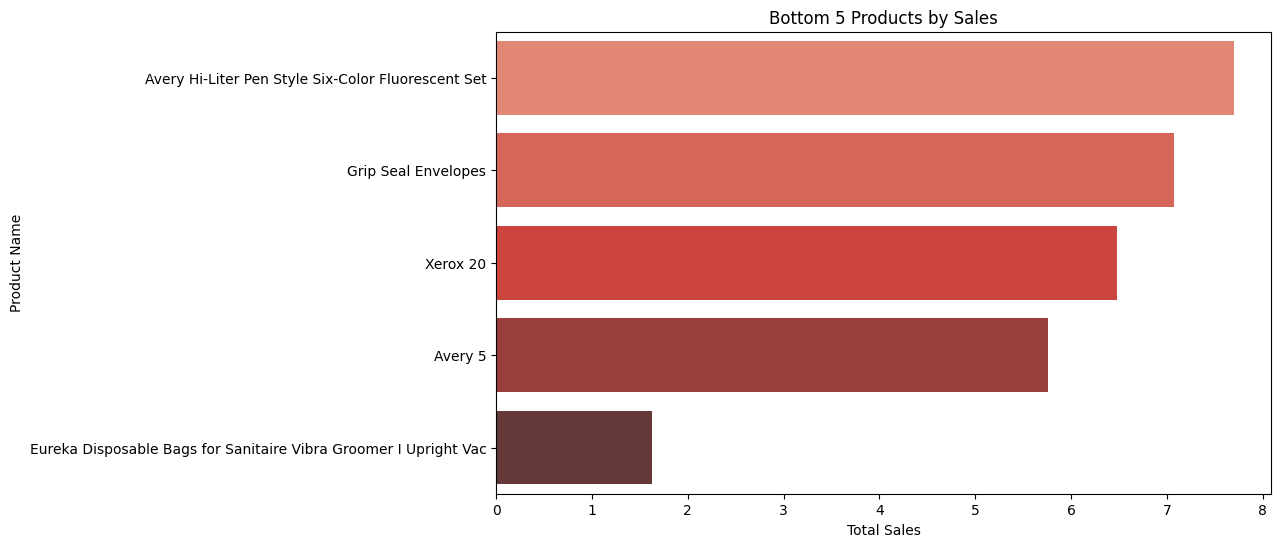

In [26]:
# Plotting bottom 5 products by sales
plt.figure(figsize=(10, 6))
sns.barplot(x='total_sales', y='Product Name', data=bottom_5_products, palette='Reds_d')
plt.title('Bottom 5 Products by Sales')
plt.xlabel('Total Sales')
plt.ylabel('Product Name')
plt.show()

<ipython-input-27-0a4eb228574f>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='total_profit', y='Product Name', data=top_5_products_by_profit, palette='Greens_d')


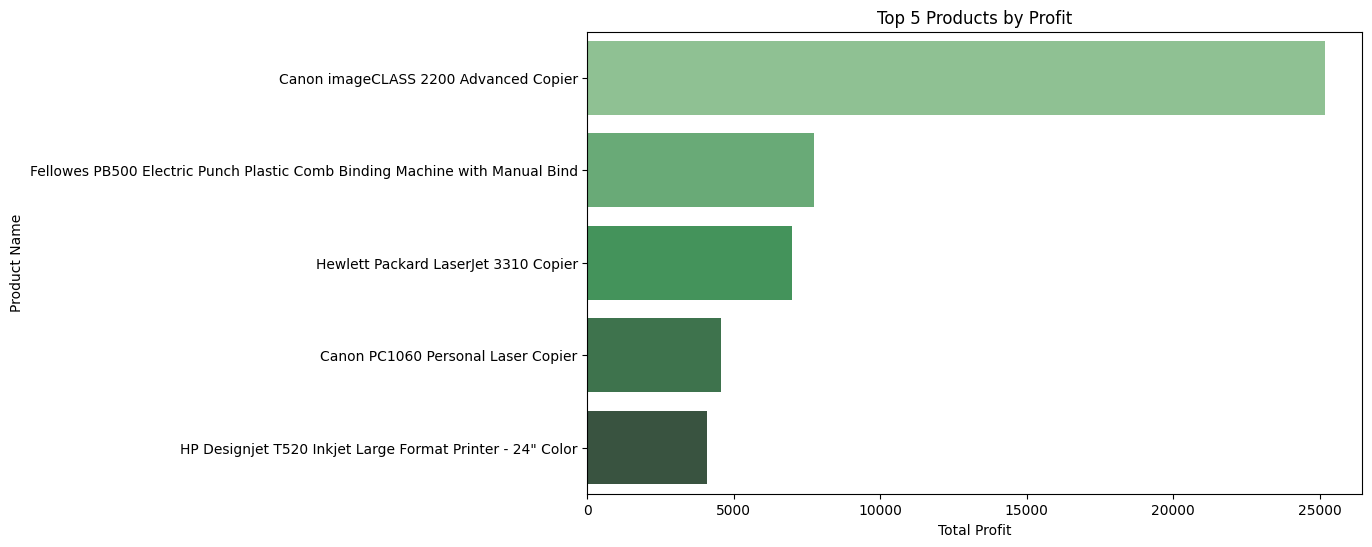

In [27]:
# Plotting profitability of top 5 products by profit
top_5_products_by_profit = product_sales_profit.sort_values(by='total_profit', ascending=False).head(5)
plt.figure(figsize=(10, 6))
sns.barplot(x='total_profit', y='Product Name', data=top_5_products_by_profit, palette='Greens_d')
plt.title('Top 5 Products by Profit')
plt.xlabel('Total Profit')
plt.ylabel('Product Name')
plt.show()

<ipython-input-28-a3932343c71c>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='total_profit', y='Product Name', data=bottom_5_products_by_profit, palette='Oranges_d')


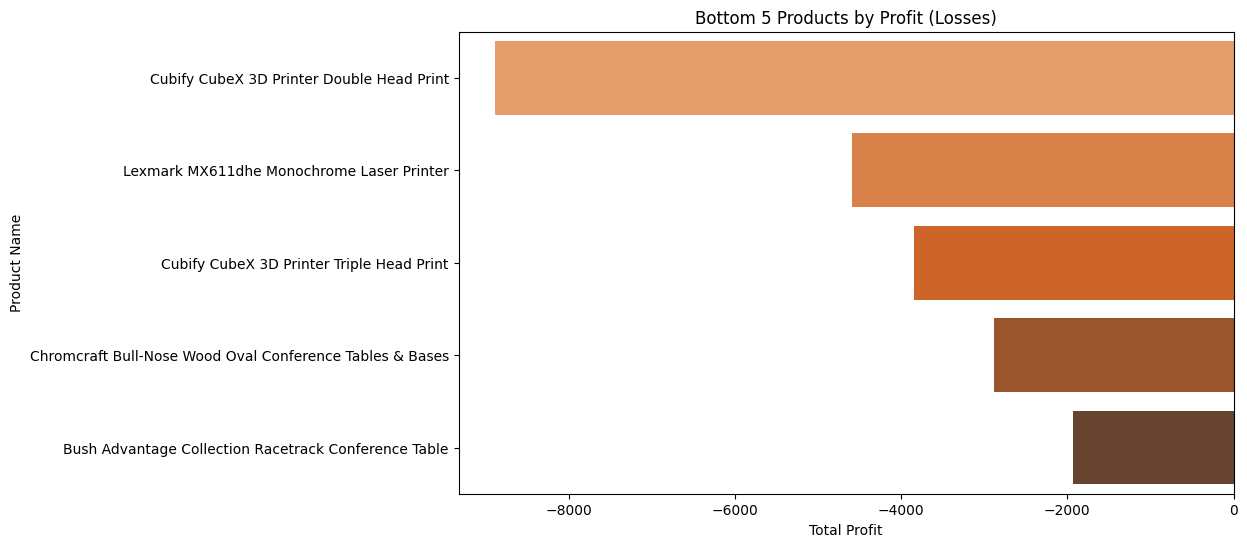

In [28]:
# Plotting loss of bottom 5 products by profit
bottom_5_products_by_profit = product_sales_profit.sort_values(by='total_profit', ascending=True).head(5)
plt.figure(figsize=(10, 6))
sns.barplot(x='total_profit', y='Product Name', data=bottom_5_products_by_profit, palette='Oranges_d')
plt.title('Bottom 5 Products by Profit (Losses)')
plt.xlabel('Total Profit')
plt.ylabel('Product Name')
plt.show()

In [30]:
# Correlation Analysis - Focusing on Sales, Profit, and Discount
correlation_matrix = df[['Sales', 'Profit', 'Discount']].corr()

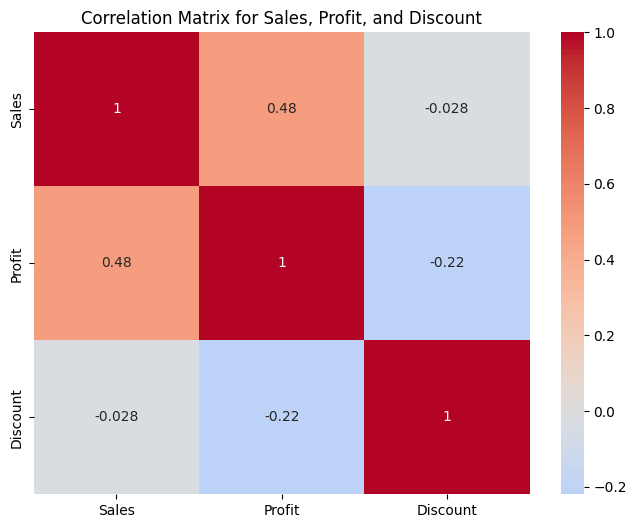

In [31]:
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix for Sales, Profit, and Discount')
plt.show()

In [33]:
# Calculate the latest date in the dataset
latest_date = df['Order Date'].max()

In [34]:
# Preparing data for RFM Analysis
rfm = df.groupby('Customer ID').agg({
    'Order Date': lambda x: (latest_date - x.max()).days,
    'Order ID': 'nunique',
    'Sales': 'sum'
}).reset_index()

In [35]:
# Rename columns to reflect RFM metrics
rfm.columns = ['Customer ID', 'Recency', 'Frequency', 'Monetary']

In [36]:
# Display the RFM table
rfm.head()

,Customer ID,Recency,Frequency,Monetary
0,AA-10315,184,5,5563.560
1,AA-10375,19,9,1056.390
2,AA-10480,259,4,1790.512
3,AA-10645,55,6,5086.935
4,AB-10015,415,3,886.156
